In [1]:
import numpy as np 
import pandas as pd


In [2]:
df=pd.read_csv('spam.csv', encoding="ISO-8859-1")

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [5]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df=df.drop(columns=[ 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df['text'][3]

'U dun say so early hor... U c already then say...'

In [11]:
from sklearn.preprocessing  import LabelEncoder
encoder=LabelEncoder()

In [12]:
df['target']=encoder.fit_transform(df['target'])

In [13]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
#missing values
#check for duplicated values
df.isnull().sum()


target    0
text      0
dtype: int64

In [15]:
df=df.drop_duplicates(keep='first')

In [16]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# 2.EDA


In [17]:
 df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

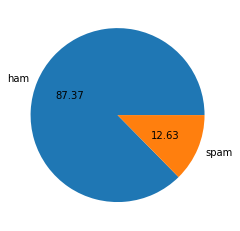

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
#data is imbalanced

In [20]:
import nltk
from nltk import word_tokenize

In [21]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [22]:
df['num_characters']=(df['text']).apply(len)

C:\Users\DC\AppData\Local\Temp\ipykernel_9080\2317922503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=(df['text']).apply(len)


In [23]:
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [24]:
df['num_words']=df['text'].apply(lambda x:len(word_tokenize(x)))

C:\Users\DC\AppData\Local\Temp\ipykernel_9080\173657118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(word_tokenize(x)))


In [25]:
df

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [26]:
from nltk import sent_tokenize
df['num_sentences']=df['text'].apply(lambda x:len(sent_tokenize(x)))

C:\Users\DC\AppData\Local\Temp\ipykernel_9080\132419221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['text'].apply(lambda x:len(sent_tokenize(x)))


In [27]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [28]:
df[['num_characters','num_words','num_sentences']].value_counts()

num_characters  num_words  num_sentences
22              6          1                34
32              8          1                30
24              6          1                29
27              7          1                29
29              7          1                29
                                            ..
96              27         2                 1
                26         3                 1
                25         1                 1
                24         4                 1
910             175        1                 1
Length: 2661, dtype: int64

In [29]:
from ydata_profiling import ProfileReport

ModuleNotFoundError: No module named 'wordcloud.color_from_image'

In [ ]:
!pip install ydata_profiling

In [ ]:
profile=ProfileReport(df[['num_characters','num_words','num_sentences']],title='reports')

In [ ]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

In [ ]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

In [ ]:
import seaborn as sns

In [ ]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

In [ ]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing
lower case
tokenization
removing special characters
removing stop words
stemming

In [ ]:
df['temp']=df['text'].copy()

In [ ]:
df['temp'].str.lower

In [ ]:
import string
char=string.punctuation
char

In [ ]:
from nltk.corpus import stopwords
w=stopwords.words('english')
w

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def all_preprocess(text):
    text=text.lower()
    text=text.translate(str.maketrans('','',char))
    text=nltk.word_tokenize(text)
    list=[]
    for i in text:#stopword removal
        if i not in w:
            list.append(i)
    list=" ".join(list)
    x=[]
    for word in list.split():            #stemming
        x.append(ps.stem(word))
    
    return " ".join(x)


In [ ]:
all_preprocess('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

In [ ]:
df['temp'][0]

In [ ]:
df['temp']=df['temp'].apply(all_preprocess)

In [ ]:
df

In [ ]:
# Rename a column
#df.rename(columns={'old_column_name': 'new_column_name'}, inplace=True)
# Drop a column
#df.drop(columns='column_to_drop', inplace=True)

In [ ]:
from wordcloud import WordCloud
font_path="C:\\Users\DC\\datasets\\arial\\arial.ttf"
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white',font_path="./arial.ttf")

In [ ]:
text_to_generate_wordcloud = (df[df['target'] == 1]['temp'].str.cat(sep=' '))

In [ ]:
spam_wc = wc.generate(text_to_generate_wordcloud)
plt.figure(figsize=(15,6))

In [ ]:
!pip install WordCloud


In [ ]:
spam_corpus=[]
for msg in df[df['target']==1]['temp'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
spam_corpus

In [ ]:
from collections import Counter

In [ ]:
Counter(spam_corpus).most_common(30)

In [ ]:
plt.xticks(rotation='vertical')
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.show()

In [ ]:
ham_corpus=[]
for msg in df[df['target']==0]['temp'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        

In [ ]:
plt.xticks(rotation='vertical')
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.show()

# Model Building
to apply to models like naive bayes we need input to be numbers so we convert out text to numbers by various methods like bagofwords tfidf ngrams etc

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [ ]:
x=cv.fit_transform(df['temp']).toarray()

In [ ]:
y=df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(x_train, y_train)
y_pred1=gnb.predict(x_test)
print('accuracy_score1 is',accuracy_score(y_test,y_pred1))
print('confusion matrix1 is',confusion_matrix(y_test,y_pred1))
print('precision_score1 is',precision_score(y_test,y_pred1))

In [ ]:
mnb.fit(x_train, y_train)
y_pred2=mnb.predict(x_test)
print('accuracy_score2 is',accuracy_score(y_test,y_pred2))
print('confusion matrix2 is',confusion_matrix(y_test,y_pred2))
print('precision_score2 is',precision_score(y_test,y_pred2))


In [ ]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print('accuracy_score3 is',accuracy_score(y_test,y_pred3))
print('confusion matrix3 is',confusion_matrix(y_test,y_pred3))
print('precision_score3 is',precision_score(y_test,y_pred3))

# with bag of words BinomialNB works best with 
accuracy_score3 is 0.971953578336557
confusion matrix3 is
[[894   2]
[ 27 111]]
precision_score3 is 0.9823008849557522

In [ ]:
#now changing approach of vectorization to tfidf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [ ]:
x=tfidf.fit_transform(df['temp']).toarray()
y=df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
gnb.fit(x_train, y_train)
y_pred1=gnb.predict(x_test)
print('accuracy_score1 is',accuracy_score(y_test,y_pred1))
print('confusion matrix1 is',confusion_matrix(y_test,y_pred1))
print('precision_score1 is',precision_score(y_test,y_pred1))
mnb.fit(x_train, y_train)
y_pred2=mnb.predict(x_test)
print('accuracy_score2 is',accuracy_score(y_test,y_pred2))
print('confusion matrix2 is',confusion_matrix(y_test,y_pred2))
print('precision_score2 is',precision_score(y_test,y_pred2))
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print('accuracy_score3 is',accuracy_score(y_test,y_pred3))
print('confusion matrix3 is',confusion_matrix(y_test,y_pred3))
print('precision_score3 is',precision_score(y_test,y_pred3))

In [ ]:
#since precision matter most multinomialNB  performs best and 
#if seen both accuracy 
#and precision score binomialNB performs good too
# tfidf---->MNB

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [ ]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [ ]:
acc_scores=[]
prec_scores=[]
for name,clf in clfs.items():
        current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
        print("For ",name)
        print("Accuracy - ",current_accuracy)
        print("Precision - ",current_precision)
    
        acc_scores.append(current_accuracy)
        prec_scores.append(current_precision)
    

In [ ]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':acc_scores,'Precision':prec_scores})
(performance_df)

In [ ]:
#improving the model by hypertuning max_features in tfidf=3000

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [ ]:
x=tfidf.fit_transform(df['temp']).toarray()
y=df['target'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
gnb=GaussianNB()

bnb=BernoulliNB()
gnb.fit(x_train, y_train)
y_pred1=gnb.predict(x_test)
print('accuracy_score1 is',accuracy_score(y_test,y_pred1))
print('confusion matrix1 is',confusion_matrix(y_test,y_pred1))
print('precision_score1 is',precision_score(y_test,y_pred1))
mnb=MultinomialNB()
mnb.fit(x_train, y_train)
y_pred2=mnb.predict(x_test)
print('accuracy_score2 is',accuracy_score(y_test,y_pred2))
print('confusion matrix2 is',confusion_matrix(y_test,y_pred2))
print('precision_score2 is',precision_score(y_test,y_pred2))
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print('accuracy_score3 is',accuracy_score(y_test,y_pred3))
print('confusion matrix3 is',confusion_matrix(y_test,y_pred3))
print('precision_score3 is',precision_score(y_test,y_pred3))

In [ ]:
#tfidf(max_features=3000)-->MNB works best

In [ ]:
import pickle

In [ ]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))


In [ ]:
pickle.dump(mnb,open('model.pkl','wb'))